<a href="https://colab.research.google.com/github/Raphael-Blaize/Autolib-Hypothesis-and-Stastical-overview/blob/main/Autolib_electric_car_sharing_service_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM DEFINATION**

Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

To work on this project, we will perform the following analysis with Python; 

Find and deal with outliers, anomalies, and missing data within the dataset.
Plot appropriate univariate and bivariate summaries recording our observations.
Implement the solution by performing hypothesis testing.
This will need to be documented when writing the report. 


# **DATASETS USED IN THIS ANALYSIS**

DATASET FILES:
1.   Variable Definitions: http://bit.ly/DSCoreAutolibDatasetGlossary
2.   Dataset: http://bit.ly/DSCoreAutolibDataset










### **DEFINING THE QUESTION**

NULL HYPOTHESIS - Average number of blue cars returned is the same as the average number of blue cars taken 

ALTERNATIVE HYPOTHESIS - The average number of blue cars returned is different then the average number of blue cars taken

## **DATA SECTION**

### **IMPORTING THE LIBRARIES WE NEED AND LOOKING THROUGH OUR DATASET TO UNDERSTAND IT BETTER**

In [67]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [68]:
#Importing our Autolib dataset
Auto = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")

#previewing the first 10 rows of our dataset
Auto.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [69]:
#previewing the last 10 rows of our dataset
Auto.tail(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,6/11/2018,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [70]:
# checking datatypes
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


### **DATA PREPEOCESSING**

### **DATA PREPEOCESSING**

In [71]:
#cheking the sum of missing values in our columns
Auto.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

 We can see that our dataset does not contain any missing values from as shown above 

#### **CHECKING MY COLUMN DATATYPES**

In [72]:
#Cheking the datatypes in our colums
Auto.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

Our datatypes look fine so there is no need to change the datatypes of any column 

#### **CHECKING AND TAKING CARE OF ANY OUTLIERS IN OUR DATASET**

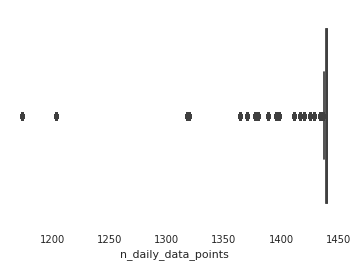

In [73]:
#Visualising outliers in our integer columns 
sns.boxplot(x=Auto['n_daily_data_points'])

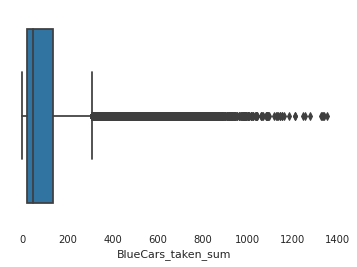

In [74]:
#Visualising outliers in our integer columns 
sns.boxplot(x=Auto['BlueCars_taken_sum'])

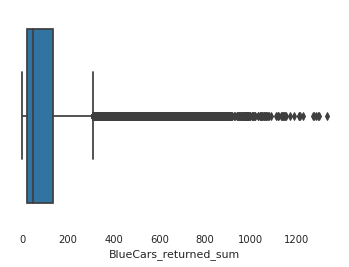

In [75]:
#Visualising outliers in our integer columns 
sns.boxplot(x=Auto['BlueCars_returned_sum'])

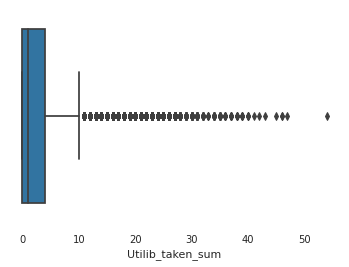

In [76]:
#Visualising outliers in our integer columns 
sns.boxplot(x=Auto['Utilib_taken_sum'])

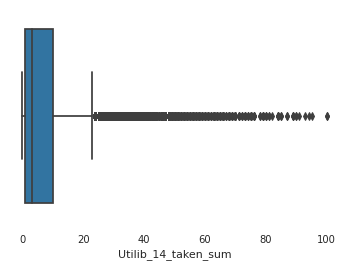

In [77]:
#Visualising outliers in our integer columns 
sns.boxplot(x=Auto['Utilib_14_taken_sum'])

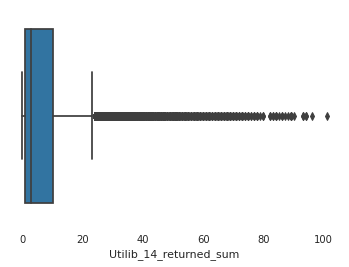

In [78]:
#Visualising outliers in our integer columns 
sns.boxplot(x=Auto['Utilib_14_returned_sum'])

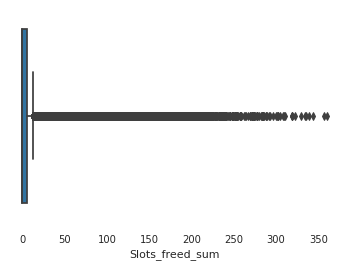

In [79]:
#Visualising outliers in our integer columns 
sns.boxplot(x=Auto['Slots_freed_sum'])

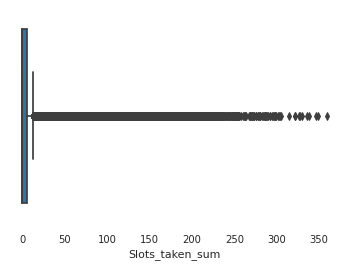

In [80]:
#Visualising outliers in our integer columns 
sns.boxplot(x=Auto['Slots_taken_sum'])

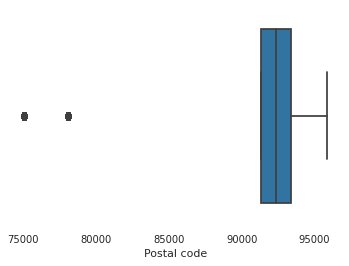

In [81]:
#Visualising outliers in our integer columns 
sns.boxplot(x=Auto['Postal code'])

From the above box plots we can see that this dataset contains many outliers, dropping them might affects the accuracy of analysis or even my hypothesis at this point but also leaving them will affect the validity of my test and it will biased so i will drop them in-order to avoid that 

In [82]:
#dropping the outliers in the two columns using IQR 
Q1 = Auto.quantile(0.25)
Q3 = Auto.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Postal code               2070.0
n_daily_data_points          1.0
dayOfWeek                    4.0
BlueCars_taken_sum         115.0
BlueCars_returned_sum      115.0
Utilib_taken_sum             4.0
Utilib_returned_sum          4.0
Utilib_14_taken_sum          9.0
Utilib_14_returned_sum       9.0
Slots_freed_sum              5.0
Slots_taken_sum              5.0
dtype: float64


In [83]:
#cheking the shape of our dataset before dropping the outliers
Auto.shape

(16085, 13)

In [84]:
#dropping the outliers in the columns of our dataset
A2 = Auto[~((Auto < (Q1 - 1.5 * IQR)) |(Auto > (Q3 + 1.5 * IQR))).any(axis=1)]
A2.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


(9783, 13)

As we can see the shape of our dataset changed, so this means that we dropped any outliers in our dataset, so it safe to say that our dataset is outlier free

#### **ENSURING MY DATASET CONTAIN NO DUPLICATE VALUES**


In [85]:
#checking if my dataset has any duplicates
A2.duplicated().sum()

0

the dataset luckily contains no duplicate entries

## **PERFORMING UNIVARIATE ANALYSIS** 

In [108]:
# Renaming my columns
col_n = A2.columns.tolist()
for col in range(len(col_n)):
  col_n[col] = col_n[col].lower().replace(" ", "_")

A2.columns = col_n
A2.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

#### DROPPING UNNCESSARY COLUMNS

In [128]:
#dropping columns 
a3 = A2.drop(columns = ['date', 'n_daily_data_points', 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'])
a3

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
3899,91330,0,weekday,19,9
3900,91330,1,weekday,10,10
3901,91330,2,weekday,11,13
3903,91330,4,weekday,10,6
3905,91330,6,weekend,28,17
...,...,...,...,...,...
16079,95880,3,weekday,15,13
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35


So my sample selection only requires weekend so i will extract the weekend rows from the main dataset and put it into a new dataframe where i will base my univariate analysis from 

In [129]:
# Getting the weekend rows from my a3 dataset
a4 = a3[a3.day_type == 'weekend']
a4

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
3905,91330,6,weekend,28,17
3911,91330,5,weekend,24,21
3912,91330,6,weekend,27,30
3918,91330,5,weekend,16,10
3919,91330,6,weekend,18,14
...,...,...,...,...,...
16068,95880,6,weekend,36,33
16074,95880,5,weekend,15,15
16075,95880,6,weekend,34,32
16081,95880,5,weekend,19,19


In [130]:
# checking the number of unique values in my a4 dataframe
a4.nunique()

postal_code               79
dayofweek                  2
day_type                   1
bluecars_taken_sum       241
bluecars_returned_sum    234
dtype: int64

### **EXPLORATORY ANALYSIS**

In [90]:
# I am going to use an automatic eda to generate a report based on my categrocial and numerical features in the dataset 
# first i am going to check my pandas version
pd.__version__

'1.2.4'

from the above pandas version i may run into a join_axes type error, so i have to update pandas in-order to use the profilreport library 

In [91]:
#Upgrading my pandas to the latest version
!pip install pandas==1.2.4

Also i need to make sure that my pandas Profilinf is upto date using the below code it will install the latest version of pandas profiling into my environment

In [92]:
 !pip install pandas-profiling==2.7.1

In [93]:
#Automatic EDA Analysis
from pandas_profiling import ProfileReport

prof = ProfileReport(a4)
prof.to_notebook_iframe()
#Creating a html file where you can see the profile report much easier
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### **EXPLAINING the EDA OF THE UNIVARIATE ANALAYSI**S 


##### **Days of the week anaysis**









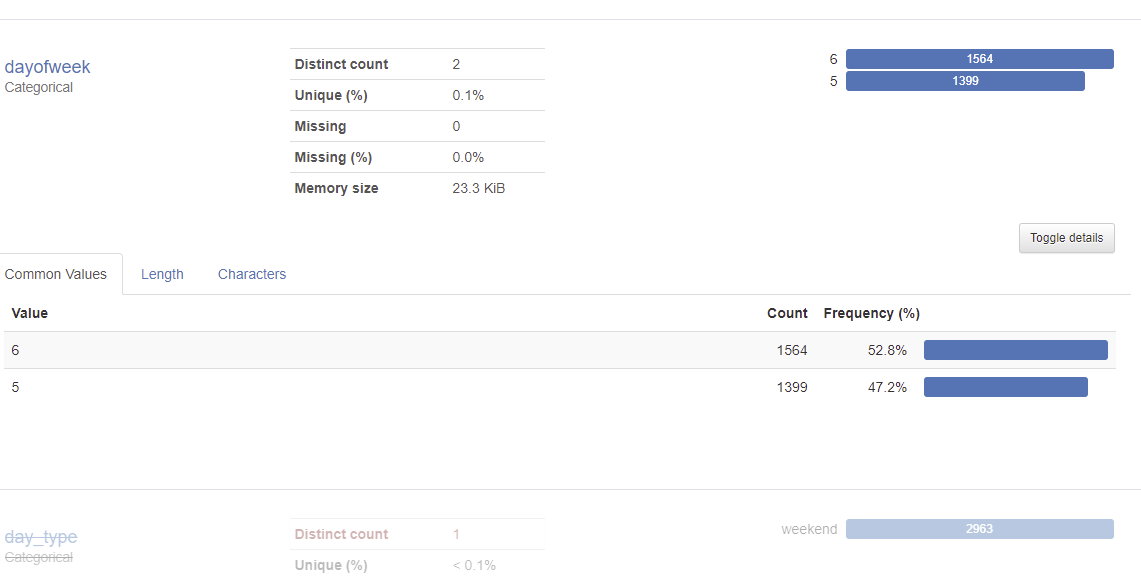


From the EDA above we can see the frequency of 6 being the highest compared to 5.

5 = Saturday
6 = Sunday

The frequency distribution tells us that there were ore sundays compared to satrudays 

##### **Bluecars_taken_sum**



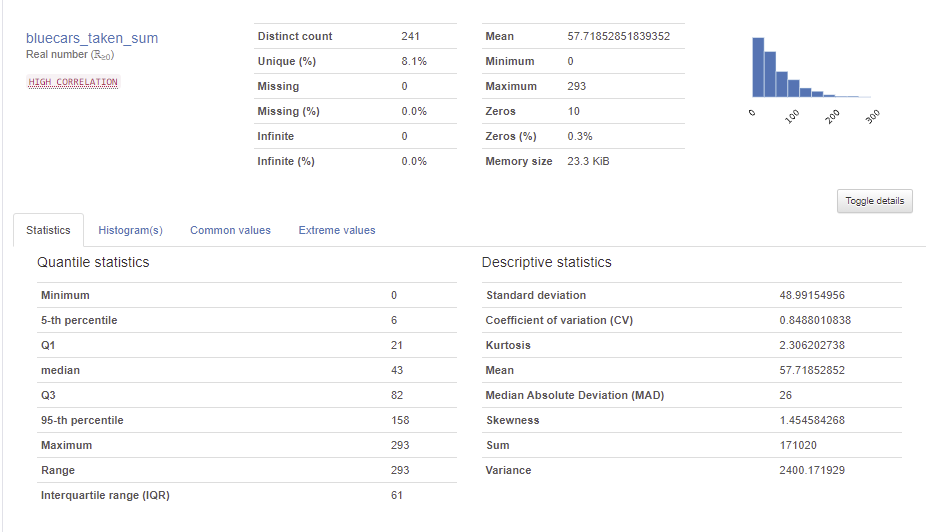

Mean

Mean of house hold size is 57.7 so we can round that of to 58, this tells us that on average there are 58 cars are taken on the weekend


STANDARD DEVIATION ANALYSIS

We can also see the Standard deviation above is at 48.9, sd(Standard deviation tell us how spread our data is from the mean), to find if our data is close to the mean we calculate the coefficient of Variation by dividing the sd by the mean

In this case we can see that the cv(Coefficient Variation) = 0.84, a rule of thumb is is the cv < 1, there is a low variation and in this case we can say that there is a low variation in our data, meaning our data points in the blue cars_taken_sum is closer to the average

KURTOSIS

In this case we can see our Kurtosis is at 2.30, we can say that this data has a distribution of heavy tails, it is a Leptokurtic distribution, since the kurtosis is closer to 3

SKEWNESS

The skewness of the data in this column is 	1.45, we can say that the data is highly skewed

HISTOGRAM

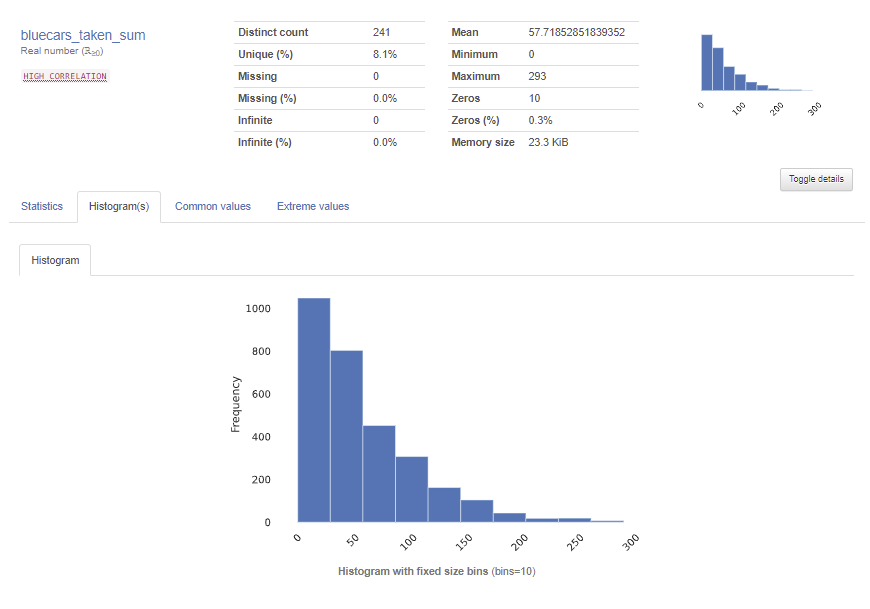


##### **Blue cars returned analysis**



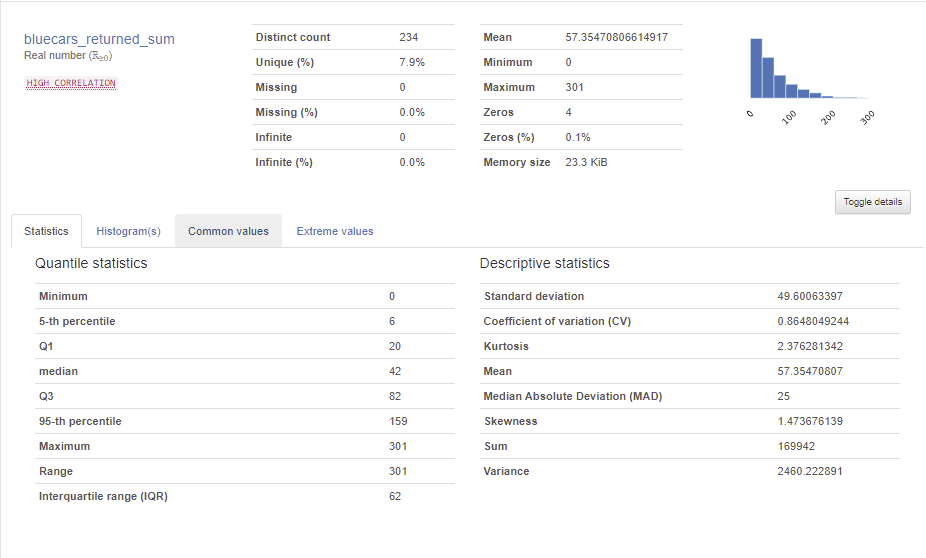



Mean

Mean of house hold size is 57.3 so we can round that of to 58, this tells us that on average there are 58 cars are taken on the weekend

STANDARD DEVIATION ANALYSIS

We can also see the Standard deviation above is at 49, sd(Standard deviation tell us how spread our data is from the mean), to find if our data is close to the mean we calculate the coefficient of Variation by dividing the sd by the mean

In this case we can see that the cv(Coefficient Variation) = 0.86, a rule of thumb is is the cv < 1, there is a low variation and in this case we can say that there is a low variation in our data, meaning our data points in the blue cars_taken_sum is closer to the average

KURTOSIS

In this case we can see our Kurtosis is at 2.37, we can say that this data has a distribution of heavy tails, it is a Leptokurtic distribution, since the kurtosis is closer to 3

SKEWNESS

The skewness of the data in this column is 1.47, we can say that the data is highly skewed


HISTOGRAM

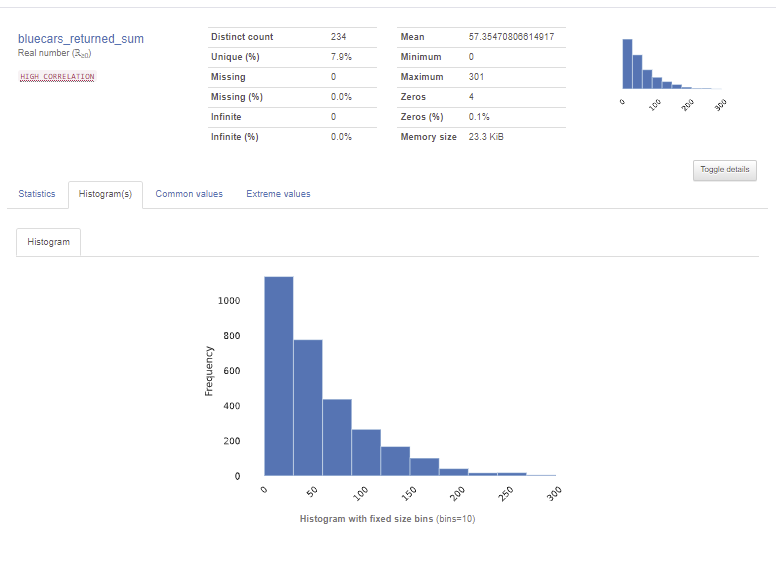

### **PERFORMING BIVARIATE ANALYSIS**

In [131]:
#Listing my columns in my dataset A4
a4.columns

Index(['postal_code', 'dayofweek', 'day_type', 'bluecars_taken_sum',
       'bluecars_returned_sum'],
      dtype='object')

scatter plot to show the relationship between Blue_cars_taken and bluecars_returned_sum



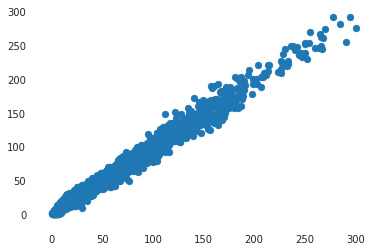

In [132]:
plt.scatter(a4["bluecars_returned_sum"], a4["bluecars_taken_sum"])
plt.show()

We can see that there is a clear positive correlation between the blue cars returned and taken, so in tis case we can say that as the number of blue cars taken increase so does the blue cars retuned.

We will calculate the pearsons co-efficient in-order to verify how string the correlation is

In [133]:
# Calcluating pearsons coefficient for the above columns 
a4["bluecars_returned_sum"].corr(a4["bluecars_taken_sum"])

0.9906487464480561

So from the above pearsons correlation we can say that the two columns have a very strong correlation

Heatmap to see whether there is correlation between the other numerical variables

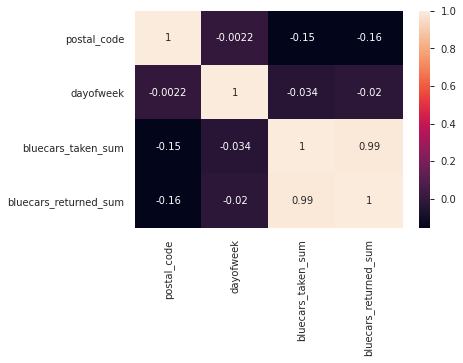

In [134]:
sns.heatmap(a4.corr(),annot=True)
plt.show()

### **SOLUTION**

#### **HYPOTHESIS TESTING**

##### DATA PREPROCESSING

In [138]:
# Dropping the day type column beacuase we do not need it in this case
a4.drop(['day_type'], axis=1, inplace=True)
a4

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
3905,91330,6,28,17
3911,91330,5,24,21
3912,91330,6,27,30
3918,91330,5,16,10
3919,91330,6,18,14
...,...,...,...,...
16068,95880,6,36,33
16074,95880,5,15,15
16075,95880,6,34,32
16081,95880,5,19,19


In [139]:
## Changing my column typed 
a4['postal_code'] = a4['postal_code'].apply(str)
a4['dayofweek'] = a4['dayofweek'].apply(str)
a4.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


postal_code              object
dayofweek                object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object

##### NORMALITY TESTS

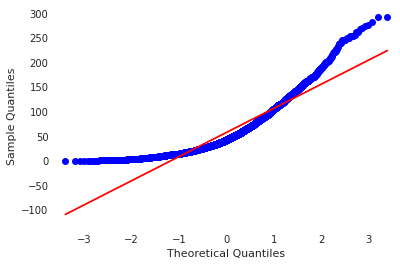

In [140]:
# qq-plot
# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot

# q-q plot
qqplot(a4["bluecars_taken_sum"], line='s')
pyplot.show()

In [141]:
# Shapiro Wilks Test
stat, p = shapiro(a4[["bluecars_taken_sum"]])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print("Sample looks Gaussian")
else:
  print("Sample does not look Gaussian")

Statistics=0.869, p=0.000
Sample does not look Gaussian


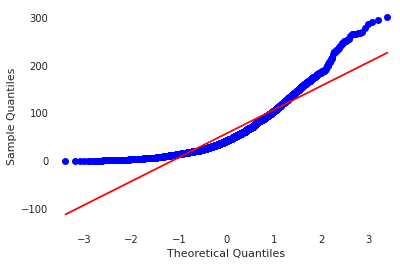

In [142]:
# qq-plot
# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot

# q-q plot
qqplot(a4["bluecars_returned_sum"], line='s')
pyplot.show()

In [143]:
# Shapiro Wilks Test
stat, p = shapiro(a4[["bluecars_returned_sum"]])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print("Sample looks Gaussian")
else:
  print("Sample does not look Gaussian")

Statistics=0.863, p=0.000
Sample does not look Gaussian


FROM THE NORMALITY TESTS ABOVE WE CAN SEE FROM THE QQ PLOT THAT THE DATA POINT ARE NOT CLOSELY FITTING TO THE DIAGONAL LINE AND THERE ARE QUITE A NUMBER OF DEVIATIONS, SO THIS TELLS US THAT THIS IS NOT A GAUSSIAN DISTRIBUTION, SMAE CASE FROM THE SHAPIRO-WILKS TEST WE CAN SEE THAT THE FIRST COLUMN WHICH IS THE CARS_TAKEN_SUM IS NOT A GAUSIAN DISTRIBUTION AND HAS A P-VALUE OF 0.00, MEANING WE CAN REJECT THE NULL HYPOTHESIS

THIS ALSO APPLIES TO THE SECOND COLUMN BLUE CARS RETURNED SUM

##### Stratified Sampling

In [147]:
#define total sample size desired
N = 270

# Stratified sample
a5 =a4.groupby('dayofweek', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(a4))))).sample(frac=1).reset_index(drop=True)
a5

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
0,93360,5,39,34
1,92170,6,71,77
2,91330,6,39,33
3,94340,5,40,38
4,92800,6,97,113
...,...,...,...,...
265,93170,5,72,64
266,92410,6,26,18
267,95100,6,38,33
268,92120,5,100,98


Getting the mean of the population 

In [172]:
# mean of bluecars_taken_sum
tm = Auto['BlueCars_taken_sum'].mean()
print("population mean of taken:", tm)

# mean of bluecars_returned_sum
tm1 = Auto['BlueCars_returned_sum'].mean()
print("population mean of returned:", tm1)

population mean of taken: 125.92695057506994
population mean of returned: 125.912713708424


Getting the mean of the sample 

In [173]:
# mean of bluecars_taken_sum
sm = a5['bluecars_taken_sum'].mean()
print("Sample mean of taken:", sm)

# mean of bluecars_returned_sum
sm1 = a5['bluecars_returned_sum'].mean()
print("Sample mean of returned:", sm1)

Sample mean of taken: 55.78148148148148
Sample mean of returned: 56.162962962962965


Getting the standard deviation of the sample

In [174]:
sd = a5['bluecars_taken_sum'].std()
print("Standard deviation of sample taken:", sd)

sd1 = a5['bluecars_returned_sum'].std()
print("Standard deviation of sample returned:", sd1)

Standard deviation of sample taken: 45.33592531526301
Standard deviation of sample returned: 46.56700930380308


Calculating the Z-score

In [175]:
zs = (sm - tm ) / sd
print(zs)

-1.5472380591286388


Calculating the p-value

In [176]:
# we can find the p-value from our z-score/z stastic from above
import scipy.stats

#find p-value for two-tailed test
p = scipy.stats.norm.cdf(zs)
print(p)

0.0609029258435012


In [177]:
#interpretation of the p value
# alpha value is 0.05
if p < 0.05:     
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


Getting our point estimation

In [178]:
Auto['BlueCars_taken_sum'].mean() - a5['bluecars_taken_sum'].mean()

70.14546909358846

#### Conclusion

We fail to reject our nulll hypothesis 